# Data Preprocessing

Steps in data preprocessing-

1-Dealing with missing values<br>
2-Divide the dataset into Dependent & Independent variables<br>
3-dealing with categorical values<br>
4-feature scaling<br>
5-outlier removal

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_csv('demo.csv')

In [47]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,610000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79.0,Yes
8,Germany,50.0,830000.0,No
9,France,37.0,67000.0,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
dataset.isna()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [48]:
dataset.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [49]:
dataset_1 = dataset.dropna()

In [50]:
dataset_1

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,610000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79.0,Yes
8,Germany,50.0,830000.0,No
9,France,37.0,67000.0,Yes


# Replacing Null values with Strategy:

 We can calculate the Mean, Median or Mode of the feature and replace it with the missing values.

In [52]:
dataset.fillna(dataset.mean(), inplace=True)

In [53]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,610000.000000,No
4,Germany,40.000000,199008.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79.000000,Yes
8,Germany,50.000000,830000.000000,No
9,France,37.000000,67000.000000,Yes


In [54]:
# to replace perticular variable
dataset['Age'].fillna((dataset['Age'].mean()),inplace=True)
dataset['Salary'].fillna((dataset['Salary'].mean()),inplace=True)

In [55]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,610000.000000,No
4,Germany,40.000000,199008.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79.000000,Yes
8,Germany,50.000000,830000.000000,No
9,France,37.000000,67000.000000,Yes


# Devide the dataset into Dependent and Independent variable

It is a dataset of a shopping complex handle the customer data who purchased that product or not.In our dataset there is three independent variables (Country, Age and Salary) and one dependent variable (Purchased) that we have to predict.

In [56]:
X = dataset.iloc[:,:-1].values      # or X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1:]         # or Y = dataset.iloc[:,-1:]

In [57]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 610000.0],
       ['Germany', 40.0, 199008.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79.0],
       ['Germany', 50.0, 830000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [58]:
Y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


#  Dealing with the categorical values

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
# create an object of that class to call our object lEncoder
lEncoder = LabelEncoder()

In [61]:
X[:,0] = lEncoder.fit_transform(X[:,0])

In [62]:
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 610000.0],
       [1, 40.0, 199008.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79.0],
       [1, 50.0, 830000.0],
       [0, 37.0, 67000.0]], dtype=object)

We can see that all three text values are converted intp numeric values_
     0 : France
     1 : Germany
     2 : Spain   

Dummy Variable : 
It  takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.
        Number of Columns = Types of Categories

In [63]:
dummy = pd.get_dummies(dataset['Country'])
dummy

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [64]:
# Concatenation
new_dataset = pd.concat([dataset,dummy], axis=1)
new_dataset

,Country,Age,Salary,Purchased,France,Germany,Spain
0,France,44.000000,72000.000000,No,1,0,0
1,Spain,27.000000,48000.000000,Yes,0,0,1
2,Germany,30.000000,54000.000000,No,0,1,0
3,Spain,38.000000,610000.000000,No,0,0,1
4,Germany,40.000000,199008.777778,Yes,0,1,0
5,France,35.000000,58000.000000,Yes,1,0,0
6,Spain,38.777778,52000.000000,No,0,0,1
7,France,48.000000,79.000000,Yes,1,0,0
8,Germany,50.000000,830000.000000,No,0,1,0
9,France,37.000000,67000.000000,Yes,1,0,0


In [65]:
new_dataset.drop(['Country'],axis =1)

,Age,Salary,Purchased,France,Germany,Spain
0,44.000000,72000.000000,No,1,0,0
1,27.000000,48000.000000,Yes,0,0,1
2,30.000000,54000.000000,No,0,1,0
3,38.000000,610000.000000,No,0,0,1
4,40.000000,199008.777778,Yes,0,1,0
5,35.000000,58000.000000,Yes,1,0,0
6,38.777778,52000.000000,No,0,0,1
7,48.000000,79.000000,Yes,1,0,0
8,50.000000,830000.000000,No,0,1,0
9,37.000000,67000.000000,Yes,1,0,0


## Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. 

In [66]:
iris=pd.read_csv('iris.csv')
iris.head()
x=iris.drop('species',axis=1)

In [67]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Normalization

Normalization scales the feature between 0.0 & 1.0

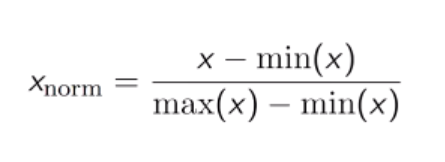

In [80]:
Image('norm.PNG')

In [68]:
#min-max normalization
temp=(x-x.min())/(x.max()-x.min())
temp

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


### Standarization

This re-distribute the data in such a way that mean (μ) = 0 and standard deviation (σ) =1

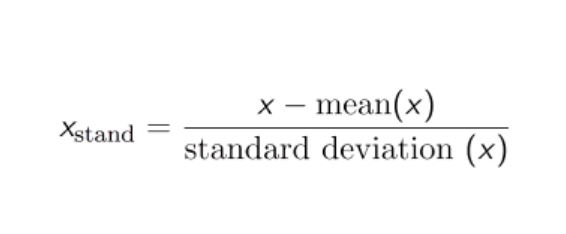

In [79]:
from IPython.display import Image
Image('stand.PNG')

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc_x = StandardScaler()

In [71]:
x_scaled = sc_x.fit_transform(X)
x_scaled

array([[-1.08347268,  0.75887436, -0.47152951],
       [ 1.32424438, -1.71150388, -0.56063129],
       [ 0.12038585, -1.27555478, -0.53835584],
       [ 1.32424438, -0.11302384,  1.52583539],
       [ 0.12038585,  0.17760889,  0.        ],
       [-1.08347268, -0.54897294, -0.52350554],
       [ 1.32424438,  0.        , -0.54578099],
       [-1.08347268,  1.34013983, -0.73854155],
       [ 0.12038585,  1.63077256,  2.3426017 ],
       [-1.08347268, -0.25834021, -0.49009238]])

## Outliers Removal

In [73]:
#Removing outliers
df = pd.DataFrame(X)
df.columns=['Country','Age','Salary']
df

,Country,Age,Salary
0,0,44.0,72000.0
1,2,27.0,48000.0
2,1,30.0,54000.0
3,2,38.0,610000.0
4,1,40.0,199008.777778
5,0,35.0,58000.0
6,2,38.777778,52000.0
7,0,48.0,79.0
8,1,50.0,830000.0
9,0,37.0,67000.0


In [74]:
#converting elements of Salary coloumn to float
df['Salary']=pd.to_numeric(df['Salary'])

<AxesSubplot:>

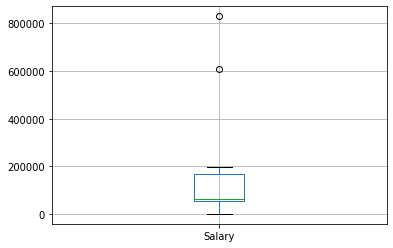

In [75]:
#Plotting Boxplot
new_df=pd.DataFrame(df['Salary'])
new_df.boxplot()

In [76]:
new_df

,Salary
0,72000.000000
1,48000.000000
2,54000.000000
3,610000.000000
4,199008.777778
5,58000.000000
6,52000.000000
7,79.000000
8,830000.000000
9,67000.000000


In [77]:
#Logic for removal of outliers
threshold = 500000.00
temp=[]
for value in new_df['Salary']:
    if value < threshold:
        temp.append(value)
df_out=pd.DataFrame(temp)
df_out.columns=['Salary']
df_out

,Salary
0,72000.000000
1,48000.000000
2,54000.000000
3,199008.777778
4,58000.000000
5,52000.000000
6,79.000000
7,67000.000000


<AxesSubplot:>

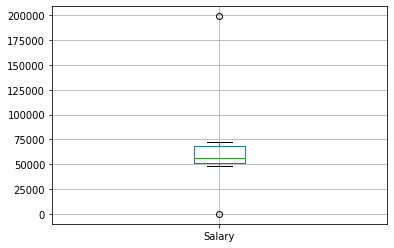

In [78]:
df_out.boxplot()